In [2]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
import nglview
from src import code_toggle
%matplotlib inline

# Quantitative Biochemistry

* My name is Dr Philip Fowler and my undergraduate was in Physics, my PhD in Chemistry and I spent ten years in the Department of Biochemistry before moving up to the John Radcliffe to establish my own research group investigating antibiotic resistance.
* I took this course over in 2020 from Professor Elspeth Garman who gave this course and developed it over 25 years. About ten years ago I was a class tutor on this course.
* Please feel free to email me with any suggestions (or any other thoughts). My email is philip.fowler@ndm.ox.ac.uk.
* This term we have 12 lectures to introduce you to the mathematics you need for biochemistry. Next term someone else will introduce the statistics you need.

# Hemoglobin

Already heard from Mark Wormald how one can infer the 3-dimensional structure of a protein from the diffraction pattern arising from shining X-rays on a protein crystal.

That requires a lot of mathematics that we aren't going to talk about today (not least Fourier transforms which require integration, exponential functions and complex numbers).

Instead we are going to look at how mathematics can help us understand the kinetics and binding of oxygen to hemoglobin.

Let's look at a structure:

Frier, J.A., Perutz, M.F. (1977) Structure of human foetal deoxyhaemoglobin. J Mol Biol 112: 97-112

PDB:1FDH



In [2]:
# ![Hb](images/41-Hemoglobin-2dhb-small.png)

view = nglview.show_pdbid("1fdh")
view.camera = 'orthographic'
view

NGLWidget()

Hemoglobin (Hb) has four oxygen binding sites so we can write

$$Hb(O_2)_n \leftrightharpoons Hb + nO_2$$

where $n \le 4$

The binding of oxygen to hemoglobin is described by the *Hill equation*

$$ Y = \frac{(pO_2)^n}{(pO_2)^n + (P_{50})^n} $$

where $Y$ is the fraction of binding sites occupied by oxygen molecules, $pO_2$ is the partial pressure of oxygen (analogous to concentration) and $P_{50}$ is a measure of affinity.

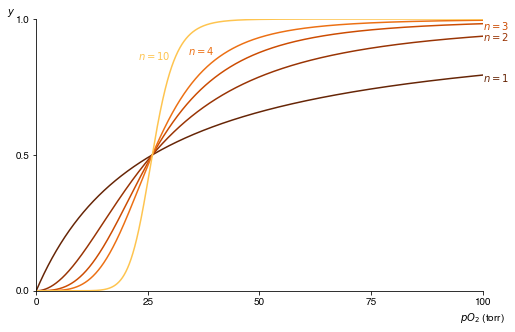

In [4]:
x = numpy.linspace(0, 100, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.set_xlim([0,100])
axis.set_ylim([0.0,1.0])
axis.set_xticks([0,25,50,75,100])
axis.set_yticks([0,0.5,1])
axis.set_xlabel('$pO_2$ (torr)',x=1)
axis.set_ylabel('$y$',rotation=0,y=1)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')
p50=26

n=1
y1 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y1,'#662506')
axis.annotate('$n=1$',xy=(100,0.77),c='#662506',ha='left')

n=2
y = (x**n)/((x**n)+(p50**n))
axis.plot(x, y,'#993404')
axis.annotate('$n=2$',xy=(100,0.92),c='#993404',ha='left')

n=3
y3 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y3,'#cc4c02')
axis.annotate('$n=3$',xy=(100,0.96),c='#cc4c02',ha='left')

n=4
y4 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y4,'#ec7014')
axis.annotate('$n=4$',xy=(40,0.87),c='#ec7014',ha='right')


n=10
y10 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y10,'#fec44f')
axis.annotate('$n=10$',xy=(30,0.85),c='#fec44f',ha='right')

plt.show()
code_toggle()

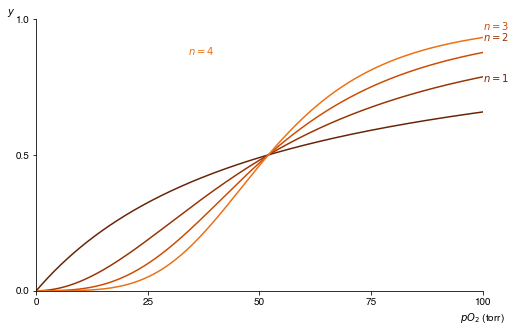

In [4]:
x = numpy.linspace(0, 100, 5000)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

axis.set_xlim([0,100])
axis.set_ylim([0.0,1.0])
axis.set_xticks([0,25,50,75,100])
axis.set_yticks([0,0.5,1])
axis.set_xlabel('$pO_2$ (torr)',x=1)
axis.set_ylabel('$y$',rotation=0,y=1)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')
p50=52

n=1
y1 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y1,'#662506')
axis.annotate('$n=1$',xy=(100,0.77),c='#662506',ha='left')

n=2
y = (x**n)/((x**n)+(p50**n))
axis.plot(x, y,'#993404')
axis.annotate('$n=2$',xy=(100,0.92),c='#993404',ha='left')

n=3
y3 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y3,'#cc4c02')
axis.annotate('$n=3$',xy=(100,0.96),c='#cc4c02',ha='left')

n=4
y4 = (x**n)/((x**n)+(p50**n))
axis.plot(x, y4,'#ec7014')
axis.annotate('$n=4$',xy=(40,0.87),c='#ec7014',ha='right')

plt.show()
code_toggle()

## How we measure $n$?

I can't draw curves like those above -- we **always** have to convert the function into the form of a straight line and then measure the gradient and y-intercept.


\begin{align*}
Y &= \frac{(pO_2)^n}{(pO_2)^n + (P_{50})^n}\\
Y &= \frac{\left ( \frac{pO_2}{P_{50}} \right )^n}{\left ( \frac{pO_2}{P_{50}} \right )^n + 1}\\
Y \left ( \left ( \frac{pO_2}{P_{50}} \right )^n + 1 \right ) &= \left ( \frac{pO_2}{P_{50}} \right )^n\\
Y &= \left ( \frac{pO_2}{P_{50}} \right )^n(1-Y)\\
\frac{Y}{1-Y} &= \left ( \frac{pO_2}{P_{50}} \right )^n\\
\end{align*}

Hmm, is that simpler?? Well if we take the logarithms of both the LHS and RHS and apply the log laws (more later!) we can simplify it...

\begin{align*}
\ln \left( \frac{Y}{1-Y} \right ) &= \ln \left ( \frac{pO_2}{P_{50}} \right )^n\\
&= n \ln \left ( \frac{pO_2}{P_{50}} \right )\\
\ln \left( \frac{Y}{1-Y} \right )&= n \ln (pO_2) - n \ln (P_{50})
\end{align*}

this looks like

$$y = m.x + c$$

i.e. if we plot $\left( \frac{Y}{1-Y} \right )$ against $\ln (pO_2)$ the gradient is $n$ and the y-intercept is $-n \ln (P_{50})$.

<div class="alert alert-block alert-success">
<img src="images/pointing-finger.png" width=50 title="For you" style="vertical-align:top"/>
We are now in position where we can take measurements in an experiment and, by plotting a graph in the form above, can estimate $n$ and $P_{50}$!
</div>

![math fight](images/xkcd-math-fight.png)